In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/processed_data_all_participants.pkl')
df.head(5)

,time_stamp[sec],user_id,activity_label,gt_heart_rate[BPM],skin_temp[C],EDA[microS],fft_N,fft_xf,BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
0,8.0,S1,0.0,49.611369,32.148125,4.716872,512,"[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....","[3.3845378816808207, 3.38976858233557, 3.52446...","[2.562674132862977, 0.11143156956661938, -0.52...","[1.1527868740280884, 0.49716310471656544, 0.12...","[2.033443262692457, 0.9587489502954717, -0.741..."
1,10.0,S1,0.0,50.323992,32.148788,4.728222,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[3.808383411435166, 4.4141701914009355, 3.0151...","[2.6222823617278266, 0.18563611962841808, -0.4...","[1.1803303061912271, 0.4308321382652773, 0.210...","[1.7456387682027168, 0.8206843400998957, 0.449..."
2,12.0,S1,0.0,52.708336,32.14697,4.739054,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[0.7342695069401706, 4.209209912863593, 3.5781...","[2.6734746500403324, -0.24896037304427496, -0....","[1.2779290837408603, 0.41187321007690075, 0.01...","[1.3509071508955937, -0.19744507193934496, -0...."
3,14.0,S1,0.0,55.640794,32.144545,4.78867,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[2.770051706946417, 4.174047012599668, 2.65538...","[2.5951888190615753, 0.8157803941949502, 0.627...","[1.5922120167574618, 1.0553402247077845, 0.721...","[1.3871223788226001, 0.037125024476421804, -0...."
4,16.0,S1,0.0,57.658406,32.143939,4.83025,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[4.333172257340451, 4.684529918870272, 4.49636...","[2.502046403655502, 1.1114429814184918, 0.3677...","[1.5711258620389141, 1.2133099373393048, 0.999...","[1.7460670246045409, 0.8034598015137145, 0.323..."


In [3]:
df['user_id'].value_counts()

S10    5321
S7     4668
S5     4649
S1     4603
S4     4572
S13    4565
S11    4521
S14    4476
S3     4367
S9     4277
S2     4099
S8     4037
S15    3966
S12    3954
S6     2622
Name: user_id, dtype: int64

In [4]:
df['activity_label'].value_counts()

0.0    17495
6.0    13552
8.0     8502
5.0     6845
7.0     4697
1.0     4573
4.0     3479
2.0     3242
3.0     2312
Name: activity_label, dtype: int64

In [5]:
df['user_id'].value_counts(normalize=True)

S10    0.082245
S7     0.072152
S5     0.071858
S1     0.071147
S4     0.070668
S13    0.070560
S11    0.069880
S14    0.069184
S3     0.067499
S9     0.066108
S2     0.063357
S8     0.062399
S15    0.061301
S12    0.061116
S6     0.040527
Name: user_id, dtype: float64

In [6]:
df['activity_label'].value_counts(normalize=True)

0.0    0.270414
6.0    0.209469
8.0    0.131413
5.0    0.105801
7.0    0.072600
1.0    0.070683
4.0    0.053774
2.0    0.050111
3.0    0.035736
Name: activity_label, dtype: float64

In [7]:
X = df[['time_stamp[sec]','user_id','activity_label','skin_temp[C]','EDA[microS]','BVP_powerSpect','ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']]
X.head(1)

,time_stamp[sec],user_id,activity_label,skin_temp[C],EDA[microS],BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
0,8.0,S1,0.0,32.148125,4.716872,"[3.3845378816808207, 3.38976858233557, 3.52446...","[2.562674132862977, 0.11143156956661938, -0.52...","[1.1527868740280884, 0.49716310471656544, 0.12...","[2.033443262692457, 0.9587489502954717, -0.741..."


In [8]:
y = df['gt_heart_rate[BPM]'].astype('float32')
y.head(1)

0    49.61137
Name: gt_heart_rate[BPM], dtype: float32

In [9]:
y_for_splitting = X['user_id'].astype('str') + '_' + X['activity_label'].astype('int').astype('str')
y_for_splitting.head(1)

0    S1_0
dtype: object

# split out a testing set

use a concated version of the user_id and the activity id to split with the label (gt_hr) in the X then slicy y_train/test out of X verify that fractions of classes are ~ maintained.

In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.15, stratify=y_for_splitting)

In [11]:
X_train.shape

(54992, 9)

In [12]:
X_test.shape

(9705, 9)

In [13]:
df['user_id'].value_counts(normalize=True) - X_test['user_id'].value_counts(normalize=True)

S10    0.000019
S7     0.000024
S5     0.000039
S1    -0.000053
S4    -0.000017
S13    0.000081
S11    0.000019
S14   -0.000059
S3     0.000008
S9     0.000060
S2    -0.000116
S8     0.000060
S15    0.000096
S12   -0.000090
S6    -0.000070
Name: user_id, dtype: float64

In [14]:
df['activity_label'].value_counts(normalize=True) - X_test['activity_label'].value_counts(normalize=True)

0.0    0.000038
6.0   -0.000114
8.0    0.000037
5.0   -0.000021
7.0    0.000060
1.0   -0.000002
4.0   -0.000013
2.0    0.000136
3.0   -0.000122
Name: activity_label, dtype: float64

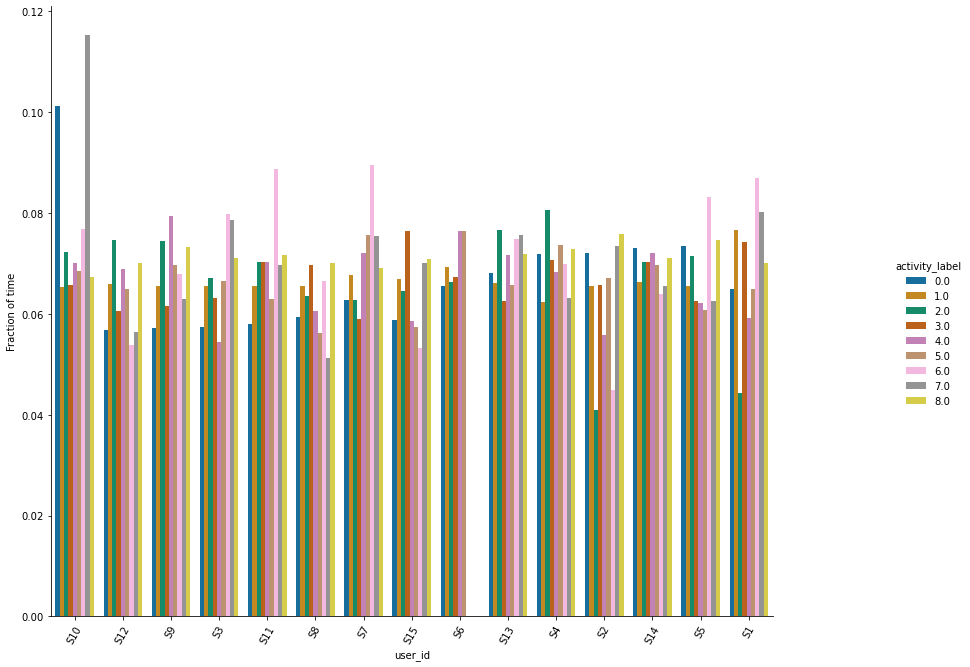

In [15]:
g_data = X_train\
            .groupby(['activity_label'])['user_id']\
            .apply(pd.Series.value_counts, normalize = True)\
            .rename('fraction')\
            .reset_index().rename(columns={'level_1':'user_id'})\
            .sort_values(by='activity_label',ascending = True)

g = sns.catplot(
                data = g_data
                ,x = 'user_id'
                ,y = 'fraction' 
                , kind = 'bar'
                , hue = 'activity_label'
                , palette = 'colorblind'
               )

g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g.axes[0,0].set_xticklabels(g.axes[0,0].get_xticklabels(),rotation = 60)
g.axes[0,0].set_xlabel('user_id')
g.axes[0,0].set_ylabel('Fraction of time');

In [ ]:
X_train.info()

# 'traditional' ML regressors

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# first need a function to parse X data frames into shape for ML (one feature per column)

In [18]:
def prep_df_for_LinReg(X_df,x_f_bins):
    f_names = ['skin_temp[C]','EDA[microS]']
    for i in range(len(x_f_bins)):
            f_names.append('BVP_power_' + str(x_f_bins[i]))
            f_names.append('ACC0_power_' + str(x_f_bins[i]))
            f_names.append('ACC1_power_' + str(x_f_bins[i]))
            f_names.append('ACC2_power_' + str(x_f_bins[i]))
            
    out_df = pd.DataFrame(columns = sorted(f_names))
    
    f_name_bvp = []
    for i in range(len(x_f_bins)):
            f_name_bvp.append('BVP_power_' + str(x_f_bins[i]))

    f_name_acc0 = []
    for i in range(len(x_f_bins)):
            f_name_acc0.append('ACC0_power_' + str(x_f_bins[i]))
    
    f_name_acc1 = []
    for i in range(len(x_f_bins)):
            f_name_acc1.append('ACC1_power_' + str(x_f_bins[i]))
            
    f_name_acc2 = []
    for i in range(len(x_f_bins)):
            f_name_acc2.append('ACC2_power_' + str(x_f_bins[i]))
    
    bvp_df = pd.DataFrame( X_df['BVP_powerSpect'].str,index = f_name_bvp).T
    
    acc0_df = pd.DataFrame( X_df['ACC0_powerSpect'].str,index = f_name_acc0).T
    acc1_df = pd.DataFrame( X_df['ACC1_powerSpect'].str,index = f_name_acc1).T
    acc2_df = pd.DataFrame( X_df['ACC2_powerSpect'].str,index = f_name_acc2).T
        
    out_df = pd.concat([bvp_df,acc0_df,acc1_df,acc2_df,X_df[['skin_temp[C]','EDA[microS]']]], axis=1)
    
    return out_df.fillna(0)

In [19]:
def pad_array_w0_to_length(i_array, desired_length):
    referance = np.zeros((desired_length,),dtype=float)
    referance[:i_array.shape[0]] = i_array
    return referance

In [ ]:
X_play = X_train.iloc[:100,:]
X_play.head(2)    

In [ ]:
X_play_in = prep_df_for_LinReg(X_play, df.fft_xf[0])
X_play_in

In [20]:
X_train_in = prep_df_for_LinReg(X_train, df.fft_xf[0])

C:\Users\PFCva\AppData\Local\Temp\ipykernel_22964\411684310.py:27: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  bvp_df = pd.DataFrame( X_df['BVP_powerSpect'].str,index = f_name_bvp).T
C:\Users\PFCva\AppData\Local\Temp\ipykernel_22964\411684310.py:29: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  acc0_df = pd.DataFrame( X_df['ACC0_powerSpect'].str,index = f_name_acc0).T
C:\Users\PFCva\AppData\Local\Temp\ipykernel_22964\411684310.py:30: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  acc1_df = pd.DataFrame( X_df['ACC1_powerSpect'].str,index = f_name_acc1).T
C:\Users\PFCva\AppData\Local\Temp\ipykernel_22964\411684310.py:31: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  acc2_df = pd.DataFrame( X_df['ACC2_powerSpect'].str,index = f_name_acc2).T


In [21]:
y_train.shape

(54992,)

In [22]:
X_train_in.shape

(54992, 262)

In [23]:
mae = make_scorer(mean_absolute_error)
mse = make_scorer(mean_squared_error)

#### try WITH  PCA

In [47]:
pca_scores = {'n_PC':[],'mean_MAE':[],'std_MAE':[]}
for i in range(262,9,-12):
    pca_scores['n_PC'].append(i)
    pipe = Pipeline([('pca', PCA(i))
                     , ('scaling', RobustScaler())
                     , ('lr', LinearRegression())
                    ])

    scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3))
    pca_scores['mean_MAE'].append(scores['test_MAE'].mean())
    pca_scores['std_MAE'].append(scores['test_MAE'].std())

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Don

In [73]:
pca_scores = pd.DataFrame(pca_scores)
pca_scores['COV_MAE_pct'] = pca_scores['std_MAE']/pca_scores['mean_MAE']*100

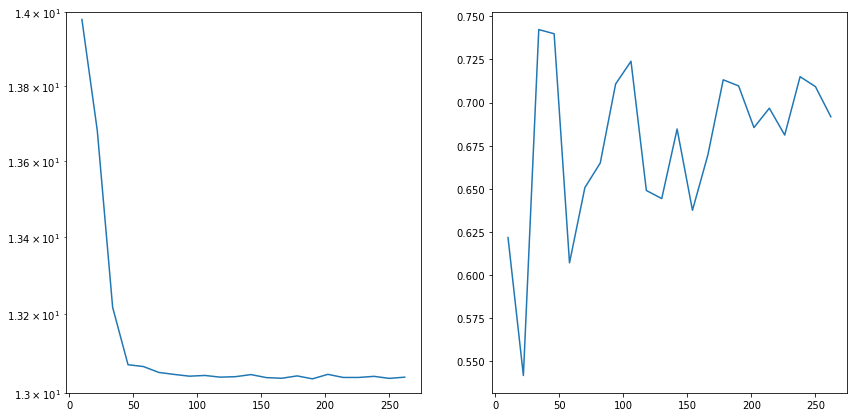

In [115]:
fig_1, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(14, 7))
ax_1.set(yscale='log')
# sns.lmplot(ax=ax_1, data=pd.DataFrame(pca_scores), x='n_PC', y='mean_MAE')
ax_1.semilogy(pca_scores.n_PC, pca_scores.mean_MAE)
ax_1.set_ylim([13,14])
ax_2.plot(pca_scores.n_PC, pca_scores.COV_MAE_pct);

In [95]:
pipe = Pipeline([('pca', PCA(100))
                     , ('scaling', MinMaxScaler())
                     , ('lr', LinearRegression())
                    ])

scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3))
scores.test_MAE.mean()

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.1s finished


13.042519492538087

In [93]:
pipe = Pipeline([('pca', PCA(50))
                     , ('scaling', MinMaxScaler())
                     , ('lr', LinearRegression())
                    ])

scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3))
scores.test_MAE.mean()

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.4s finished


13.081321982894554

use a PCA wtih ~ 50 dimentions as can be seen there is very little improvment from 50 components to 100.

SDT of MAE is all quite low COV = (SDT/Mean) ~~ 0.7%

#### try WITH OUT  PCA

In [96]:
pipe = Pipeline([('scaling', MinMaxScaler())
                 , ('lr', LinearRegression())
                ])

scores = cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3)

scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3))
scores.test_MAE.mean()

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.8s finished


13.039645158954107

# Try other regressors

## SVM

In [109]:
pipe = Pipeline([('pca', PCA(50))
                     , ('scaling', MinMaxScaler())
                     , ('scv', SVR(C=1))
                    ])

scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3,error_score='raise'))
scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  2.9min remaining:  4.3min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  6.4min finished


,fit_time,score_time,test_MSE,test_MAE
0,127.716644,43.826905,226.486608,10.041622
1,128.582374,44.170730,219.715103,9.868772
2,126.721848,256.200691,224.851347,9.955446
3,110.625039,42.495886,224.341378,9.931791
4,114.768020,42.303773,218.144354,9.892625


In [101]:
pipe = Pipeline([('pca', PCA(50))
                     , ('scaling', MinMaxScaler())
                     , ('scv', SVR(C=.5))
                    ])

scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3,error_score='raise'))
scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  4.9min remaining:  7.4min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  7.3min finished


,fit_time,score_time,test_MSE,test_MAE
0,111.468226,258.185683,254.679883,10.721039
1,111.334594,43.895893,246.468882,10.520576
2,111.385454,259.363006,258.290411,10.725614
3,95.839365,44.591333,251.450540,10.530242
4,97.068614,42.367364,248.400739,10.592156


In [108]:
pipe = Pipeline([('pca', PCA(50))
                     , ('scaling', MinMaxScaler())
                     , ('scv', SVR(C=.9))
                    ])

scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3,error_score='raise'))
scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  2.8min remaining:  4.2min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  5.3min finished


,fit_time,score_time,test_MSE,test_MAE
0,122.544109,44.774309,228.716955,10.088587
1,126.940852,44.462742,220.641340,9.880042
2,124.288915,44.040788,229.944695,10.046940
3,106.300674,42.802399,225.591284,9.975834
4,106.257605,42.067117,222.299061,10.001039


## Randome Forest

In [113]:
pipe = Pipeline([('pca', PCA(50))
                 , ('scaling', MinMaxScaler())
                 , ('rfr', RandomForestRegressor(n_estimators=100, min_samples_leaf=50))
                 ])

scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3,error_score='raise'))
scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.4min finished


,fit_time,score_time,test_MSE,test_MAE
0,100.778769,0.118679,190.950433,9.685980
1,101.242511,0.132641,184.078925,9.480704
2,101.156744,0.128651,185.794001,9.471676
3,98.157686,0.122667,183.736405,9.491480
4,99.113163,0.122661,185.124294,9.442907


In [112]:
pipe = Pipeline([('pca', PCA(50))
                 , ('scaling', MinMaxScaler())
                 , ('rfr', RandomForestRegressor(n_estimators=50, min_samples_leaf=50))
                 ])

scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3,error_score='raise'))
scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:   49.7s remaining:  1.2min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.6min finished


,fit_time,score_time,test_MSE,test_MAE
0,49.624934,0.074797,193.016693,9.719582
1,49.765552,0.080782,183.364160,9.479476
2,49.503263,0.074797,187.381818,9.516721
3,47.880557,0.071412,183.014993,9.513722
4,48.728862,0.068814,186.563906,9.469093


In [117]:
scores_dict = {'n_est':[],'mean_MAE':[],'std_MAE':[]}
for i in [25,50,100,150,200,500]:
    print(i)
    scores_dict['n_est'].append(i)
    pipe = Pipeline([('pca', PCA(50))
                     , ('scaling', MinMaxScaler())
                     , ('rfr', RandomForestRegressor(n_estimators=i, min_samples_leaf=50))
                    ])

    scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3))
    scores_dict['mean_MAE'].append(scores['test_MAE'].mean())
    scores_dict['std_MAE'].append(scores['test_MAE'].std())

scores = pd.DataFrame(scores_dict)
scores['COV_MAE_pct'] = scores['std_MAE']/pca_scores['mean_MAE']*100
scores

25


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:   26.6s remaining:   40.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   52.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


50


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:   51.0s remaining:  1.3min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


100


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.5min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.2min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


150


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.7min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.9min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


200


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  3.2min remaining:  4.9min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  6.4min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


500


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  8.2min remaining: 12.3min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 16.9min finished


,n_est,mean_MAE,std_MAE,COV_MAE_pct
0,25,9.552528,0.091395,0.700897
1,50,9.512958,0.099333,0.761955
2,100,9.500906,0.104079,0.798050
3,150,9.493923,0.107206,0.822203
4,200,9.500217,0.116369,0.892473
5,500,9.488381,0.107005,0.820168


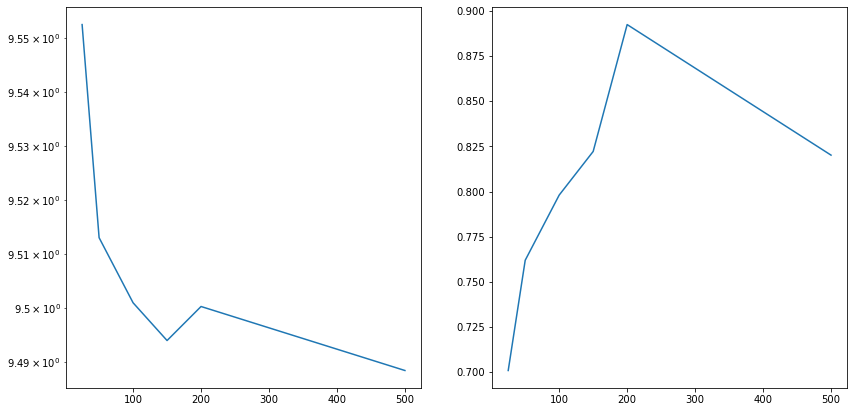

In [118]:
fig_2, (ax_3, ax_4) = plt.subplots(1, 2, figsize=(14, 7))
# ax_1.set(yscale='log')
ax_3.semilogy(scores.n_est, scores.mean_MAE)
# ax_1.set_ylim([13,14])
ax_4.plot(scores.n_est, scores.COV_MAE_pct);

In [119]:
scores_dict = {'n_min_leaf_sz':[],'mean_MAE':[],'std_MAE':[]}
for i in [25,50,100,150,200,500]:
    print(i)
    scores_dict['n_min_leaf_sz'].append(i)
    pipe = Pipeline([('pca', PCA(50))
                     , ('scaling', MinMaxScaler())
                     , ('rfr', RandomForestRegressor(n_estimators=150, min_samples_leaf=i))
                    ])

    scores = pd.DataFrame(cross_validate(pipe, X_train_in, y_train, cv=5, scoring={'MSE':mse,'MAE':mae}, verbose=3, n_jobs=3))
    scores_dict['mean_MAE'].append(scores['test_MAE'].mean())
    scores_dict['std_MAE'].append(scores['test_MAE'].std())

scores = pd.DataFrame(scores_dict)
scores['COV_MAE_pct'] = scores['std_MAE']/pca_scores['mean_MAE']*100
scores

25


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.4min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  5.8min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


50


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  2.7min remaining:  4.0min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  5.3min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


100


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.8min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.9min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


150


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.5min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


200


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.3min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.3min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


500


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.7min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.6min finished


,n_min_leaf_sz,mean_MAE,std_MAE,COV_MAE_pct
0,25,8.884727,0.087841,0.673644
1,50,9.502548,0.111973,0.858918
2,100,10.213653,0.109180,0.837159
3,150,10.676870,0.110228,0.845377
4,200,11.028071,0.118230,0.906748
5,500,12.152508,0.105185,0.806216


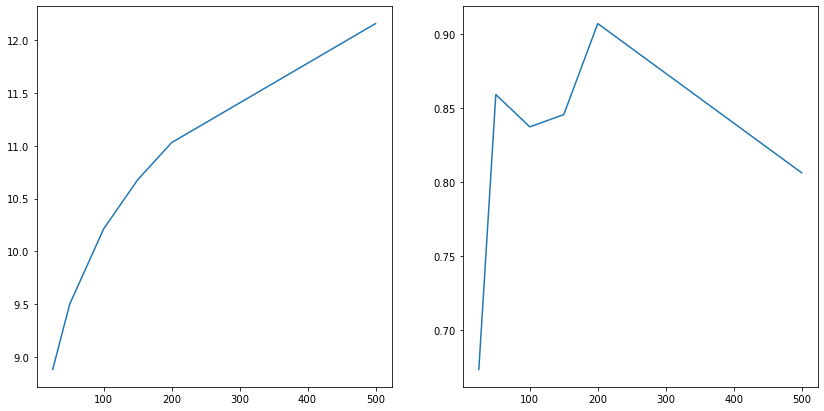

In [121]:
fig_2, (ax_3, ax_4) = plt.subplots(1, 2, figsize=(14, 7))
# ax_1.set(yscale='log')
ax_3.plot(scores.n_min_leaf_sz, scores.mean_MAE)
# ax_1.set_ylim([13,14])
ax_4.plot(scores.n_min_leaf_sz, scores.COV_MAE_pct);

In [ ]:
parameters = {'rfr__n_estimators': [25,50,100,200]
              , 'rfr__min_samples_leaf': [100, 500, 1000, 5000]
              }

pipe = Pipeline([('pca', PCA(50))
                 , ('scaling', MinMaxScaler())
                 , ('rfr', RandomForestRegressor())
                 ])

In [ ]:
gs = GridSearchCV(pipe, parameters, cv=5, scoring='recall', n_jobs=-1, verbose=4)

gs.fit(X_mod, y_mod)
gs.best_params_

In [ ]:
RandomForestRegressor

# split train set into learning and validation set for CNN

In [122]:
X_train.head(2)

,time_stamp[sec],user_id,activity_label,skin_temp[C],EDA[microS],BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
12756,8116.0,S3,8.0,35.491515,0.666044,"[2.380281482527885, 5.135216603163129, 4.53089...","[1.722068267874741, -0.43229551104323244, -0.6...","[0.46175135974814535, -1.2355959845314046, -1....","[2.652285419297868, -1.5352699580846938, -1.63..."
40517,5254.0,S10,0.0,35.153939,0.762255,"[0.6081164345393182, 3.6162660673967175, 3.984...","[2.6011112801444862, 0.1079999751440754, -0.76...","[0.9081011833126157, 0.11571896703621758, -0.1...","[1.8131129899397629, 1.0283328434798285, 0.112..."


In [123]:
y_for_splitting = X_train['user_id'].astype('str') + '_' + X_train['activity_label'].astype('int').astype('str')
y_for_splitting.head(1)

12756    S3_8
dtype: object

In [124]:
(X_learn, X_val, y_learn, y_val) = train_test_split(X_train, y_train, test_size=0.15, stratify=y_for_splitting)

In [125]:
X_train['user_id'].value_counts(normalize=True) - X_learn['user_id'].value_counts(normalize=True)

S10    0.000011
S7    -0.000026
S5     0.000004
S1     0.000004
S4    -0.000020
S13   -0.000004
S11   -0.000010
S14    0.000008
S3     0.000004
S9    -0.000009
S2     0.000011
S8     0.000004
S15    0.000004
S12    0.000021
S6    -0.000004
Name: user_id, dtype: float64

In [126]:
X_train['activity_label'].value_counts(normalize=True) - X_learn['activity_label'].value_counts(normalize=True)

0.0    2.772427e-05
6.0   -1.587168e-05
8.0   -1.631984e-06
5.0    2.735897e-05
7.0    7.589989e-07
1.0   -4.415927e-05
4.0    9.397037e-06
2.0    9.412598e-06
3.0   -1.298896e-05
Name: activity_label, dtype: float64

need to put all the data into a single input matrix

## determine scaling factors and scale X_train values
write custome function to scale X for modeling 
determine scaling prameters for BVP power spectra and all ACC power sectra (one set for BVP and one for all ACC)
this will ensure information encoded in each of the power spectra are preserved 

In [127]:
class ppg_scaler():
    temp_sp = ()
    eda_sp = ()
    bvp_sp = ()
    acc_sp = ()
    
    def fit(self,X):
        self.temp_sp = (X['skin_temp[C]'].min(), X['skin_temp[C]'].max())
        self.eda_sp = (X['EDA[microS]'].min(), X['EDA[microS]'].max())
        
        temp = np.concatenate(X['BVP_powerSpect'].values).ravel()
        self.bvp_sp = (temp.min(), temp.max())
        
        temp = np.concatenate(np.concatenate(X[['ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']].values)).ravel()
        self.acc_sp = (temp.min(), temp.max())    
    
    def transform(self,X):
        X_out = pd.DataFrame()
        X_out['skin_temp[C]'] = X['skin_temp[C]'].apply(lambda x: (x-self.temp_sp[0])/(self.temp_sp[1] - self.temp_sp[0]))
        
        X_out['EDA[microS]'] = X['EDA[microS]'].apply(lambda x: (x-self.eda_sp[0])/(self.eda_sp[1] - self.eda_sp[0]))
        
        X_out['BVP_powerSpect'] = X['BVP_powerSpect'].apply(lambda x: (x-self.bvp_sp[0])/(self.bvp_sp[1] - self.bvp_sp[0]))
        
        X_out[['ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']] = X[['ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']].apply(lambda x: (x-self.acc_sp[0])/(self.acc_sp[1] - self.acc_sp[0]))

        return X_out
    
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)

##  pack all values into a NX5X65 np array padding with 0s if arays are not long enough

In [128]:
def prep_df_for_CNN(scaled_X_df):
    out_length = 65
    CNN_inp = np.zeros((5,65,1))
    for i_row in scaled_X_df.iterrows():
        temp_df = pd.DataFrame(np.zeros([1,out_length]))
        temp_df = pd.concat([temp_df, pd.DataFrame([i_row[1]['skin_temp[C]'], i_row[1]['EDA[microS]']]).T])
        temp_df = pd.concat([temp_df, pd.DataFrame(i_row[1]['BVP_powerSpect']).T])
        temp_df = pd.concat([temp_df, pd.DataFrame(i_row[1]['ACC0_powerSpect']).T])
        temp_df = pd.concat([temp_df, pd.DataFrame(i_row[1]['ACC1_powerSpect']).T])
        temp_df = pd.concat([temp_df, pd.DataFrame(i_row[1]['ACC2_powerSpect']).T])
        temp_df = temp_df.reset_index().drop(index=0).drop(columns='index').fillna(0)
        CNN_inp = np.dstack((CNN_inp, temp_df.values))
    
    CNN_inp = np.moveaxis(CNN_inp,2,0)[1:].astype('float32')
    CNN_inp = CNN_inp.reshape(CNN_inp.shape[0],CNN_inp.shape[1],CNN_inp.shape[2],1)
    return CNN_inp

In [ ]:
# X_play = X_train.iloc[:10,:]
# X_play.head(2)

In [ ]:
# scaler = ppg_scaler()
# X_play_s = scaler.fit_transform(X_play)
# X_play_s.head(2)

In [ ]:
# prep_df_for_CNN(X_play_s).shape

In [129]:
reparse_data = False
if (reparse_data):
    scaler = ppg_scaler()
    X_learn_in = prep_df_for_CNN(scaler.fit_transform(X_learn))
    X_val_in = prep_df_for_CNN(scaler.transform(X_val))
    X_test_in = prep_df_for_CNN(scaler.transform(X_test))

    pd.to_pickle(scaler,'E:/data_files/ppg_data/PPG_FieldStudy/scaler_CNN.pkl')
    pd.to_pickle(X_val_in,'E:/data_files/ppg_data/PPG_FieldStudy/X_val_in_CNN.pkl')
    pd.to_pickle(X_learn_in,'E:/data_files/ppg_data/PPG_FieldStudy/X_learn_in_CNN.pkl')
    pd.to_pickle(X_test_in,'E:/data_files/ppg_data/PPG_FieldStudy/X_test_in_CNN.pkl')

    pd.to_pickle(y_learn,'E:/data_files/ppg_data/PPG_FieldStudy/y_learn_CNN.pkl')
    pd.to_pickle(y_val,'E:/data_files/ppg_data/PPG_FieldStudy/y_val_CNN.pkl')
    pd.to_pickle(y_test,'E:/data_files/ppg_data/PPG_FieldStudy/y_test_CNN.pkl')
else:
    scaler = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/scaler_CNN.pkl')
    X_val_in = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/X_val_in_CNN.pkl')
    X_learn_in = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/X_learn_in_CNN.pkl')
    X_test_in = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/X_test_in_CNN.pkl')

    y_learn = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/y_learn_CNN.pkl')
    y_val = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/y_val_CNN.pkl')
    y_test = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/y_test_CNN.pkl')

# set up CNN

In [130]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

#check to make sure gpu is seen
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [131]:
tf.config.run_functions_eagerly(True)

In [137]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(5,65,1), kernel_size=(1, 3), padding='same', filters=9, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=18, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=36, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=72, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))

model.add(layers.Conv2D(kernel_size=(1,1), padding='same', filters=32, activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(1, activation='linear'))

opt = Adam(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

above appears to over fit significatly

In [141]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(5,65,1), kernel_size=(1, 3), padding='same', filters=9, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=18, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(1, activation='linear'))

opt = Adam(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

In [143]:
# did not over fit maybe try more epochs on this
model = Sequential()
model.add(layers.Conv2D(input_shape=(5,65,1), kernel_size=(1, 3), padding='same', filters=9, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=18, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))


model.add(layers.Flatten())

model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dropout(.5))

model.add(layers.Dense(1, activation='linear'))

opt = Adam(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

In [145]:
# EVEN BETTER
model = Sequential()
model.add(layers.Conv2D(input_shape=(5,65,1), kernel_size=(1, 3), padding='same', filters=9, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=18, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=36, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))


model.add(layers.Flatten())

model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dropout(.5))

model.add(layers.Dense(1, activation='linear'))

opt = Adam(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

In [150]:
# try more learning
model = Sequential()
model.add(layers.Conv2D(input_shape=(5,65,1), kernel_size=(1, 3), padding='same', filters=9, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=18, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=36, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=72, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))


model.add(layers.Flatten())
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dropout(.5))

model.add(layers.Dense(1, activation='linear'))

opt = Adam(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

In [132]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(5,65,1), kernel_size=(1, 3), padding='same', filters=9, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=18, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))


model.add(layers.Flatten())

model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(5, activation='relu'))

model.add(layers.Dense(1, activation='linear'))

opt = Adam(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

In [151]:
history = model.fit(X_learn_in, y_learn, epochs=500, validation_data=(X_val_in, y_val), batch_size = X_learn_in.shape[0]//5 )

Epoch 1/500
1/6 [====>.........................] - ETA: 0s - loss: 8529.1250 - mae: 89.5196

C:\Users\PFCva\anaconda3\envs\ppg_model\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


6/6 [==============================] - 0s 65ms/step - loss: 8512.8623 - mae: 89.4022 - val_loss: 8497.7842 - val_mae: 89.3185
Epoch 2/500
2/6 [=========>....................] - ETA: 0s - loss: 8514.5107 - mae: 89.3699

C:\Users\PFCva\anaconda3\envs\ppg_model\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


6/6 [==============================] - 0s 55ms/step - loss: 8480.6279 - mae: 89.2233 - val_loss: 8440.5781 - val_mae: 89.0008
Epoch 3/500
6/6 [==============================] - 0s 54ms/step - loss: 8401.0127 - mae: 88.7775 - val_loss: 8285.2461 - val_mae: 88.1321
Epoch 4/500
6/6 [==============================] - 0s 55ms/step - loss: 8195.8174 - mae: 87.5958 - val_loss: 7902.4312 - val_mae: 85.9534
Epoch 5/500
6/6 [==============================] - 0s 54ms/step - loss: 7709.8394 - mae: 84.6064 - val_loss: 7018.2544 - val_mae: 80.6961
Epoch 6/500
6/6 [==============================] - 0s 54ms/step - loss: 6726.1387 - mae: 77.3168 - val_loss: 5120.8979 - val_mae: 68.0621
Epoch 7/500
6/6 [==============================] - 0s 54ms/step - loss: 5486.3809 - mae: 65.5601 - val_loss: 2307.5151 - val_mae: 43.0118
Epoch 8/500
6/6 [==============================] - 0s 54ms/step - loss: 5531.7280 - mae: 65.5491 - val_loss: 2368.7861 - val_mae: 43.7112
Epoch 9/500
6/6 [=============================

6/6 [==============================] - 0s 57ms/step - loss: 3227.2747 - mae: 46.2935 - val_loss: 2388.5349 - val_mae: 44.0315
Epoch 62/500
6/6 [==============================] - 0s 58ms/step - loss: 3208.0811 - mae: 46.0654 - val_loss: 2766.0239 - val_mae: 48.0758
Epoch 63/500
6/6 [==============================] - 0s 56ms/step - loss: 3227.7693 - mae: 46.2733 - val_loss: 2536.2852 - val_mae: 45.6591
Epoch 64/500
6/6 [==============================] - 0s 58ms/step - loss: 3168.8489 - mae: 45.8744 - val_loss: 1934.3639 - val_mae: 38.6333
Epoch 65/500
6/6 [==============================] - 0s 53ms/step - loss: 3301.0435 - mae: 46.9893 - val_loss: 2365.0164 - val_mae: 43.7737
Epoch 66/500
6/6 [==============================] - ETA: 0s - loss: 3370.3662 - mae: 47.760 - 0s 54ms/step - loss: 3370.2039 - mae: 47.7588 - val_loss: 3601.3457 - val_mae: 56.0042
Epoch 67/500
6/6 [==============================] - 0s 54ms/step - loss: 3497.0833 - mae: 49.2332 - val_loss: 2919.5300 - val_mae: 49.632

6/6 [==============================] - 0s 55ms/step - loss: 3026.4536 - mae: 44.4994 - val_loss: 2379.2886 - val_mae: 43.9957
Epoch 120/500
6/6 [==============================] - 0s 54ms/step - loss: 3055.6482 - mae: 44.9166 - val_loss: 2421.1094 - val_mae: 44.4628
Epoch 121/500
6/6 [==============================] - 0s 54ms/step - loss: 3054.0928 - mae: 44.8124 - val_loss: 2740.8940 - val_mae: 47.8780
Epoch 122/500
6/6 [==============================] - 0s 55ms/step - loss: 3086.1025 - mae: 45.0623 - val_loss: 2734.6143 - val_mae: 47.8178
Epoch 123/500
6/6 [==============================] - 0s 55ms/step - loss: 3094.5039 - mae: 45.1168 - val_loss: 2487.1602 - val_mae: 45.1995
Epoch 124/500
6/6 [==============================] - 0s 54ms/step - loss: 3038.4158 - mae: 44.7352 - val_loss: 2432.8186 - val_mae: 44.6039
Epoch 125/500
6/6 [==============================] - 0s 54ms/step - loss: 3045.5264 - mae: 44.7956 - val_loss: 2440.1348 - val_mae: 44.6790
Epoch 126/500
6/6 [===============

6/6 [==============================] - 0s 54ms/step - loss: 3042.2925 - mae: 44.8476 - val_loss: 2763.9592 - val_mae: 48.1762
Epoch 178/500
6/6 [==============================] - ETA: 0s - loss: 3042.5112 - mae: 44.657 - 0s 54ms/step - loss: 3042.3691 - mae: 44.6566 - val_loss: 2674.2117 - val_mae: 47.2498
Epoch 179/500
6/6 [==============================] - 0s 54ms/step - loss: 3018.6458 - mae: 44.4776 - val_loss: 2231.7368 - val_mae: 42.3893
Epoch 180/500
6/6 [==============================] - 0s 55ms/step - loss: 3000.8120 - mae: 44.4408 - val_loss: 2202.4202 - val_mae: 42.0494
Epoch 181/500
6/6 [==============================] - 0s 57ms/step - loss: 3013.1177 - mae: 44.5549 - val_loss: 2468.9922 - val_mae: 45.0634
Epoch 182/500
6/6 [==============================] - 0s 56ms/step - loss: 3013.4336 - mae: 44.4081 - val_loss: 2711.3577 - val_mae: 47.6396
Epoch 183/500
6/6 [==============================] - 0s 56ms/step - loss: 3051.3965 - mae: 44.7951 - val_loss: 2566.1394 - val_mae: 

6/6 [==============================] - 0s 55ms/step - loss: 2950.7002 - mae: 43.9673 - val_loss: 2726.3286 - val_mae: 47.8247
Epoch 236/500
6/6 [==============================] - 0s 56ms/step - loss: 2982.3127 - mae: 44.1991 - val_loss: 2484.3496 - val_mae: 45.2667
Epoch 237/500
6/6 [==============================] - 0s 53ms/step - loss: 2967.3765 - mae: 44.2050 - val_loss: 2279.1594 - val_mae: 42.9759
Epoch 238/500
6/6 [==============================] - 0s 54ms/step - loss: 3001.4216 - mae: 44.4834 - val_loss: 2395.0020 - val_mae: 44.2827
Epoch 239/500
6/6 [==============================] - 0s 55ms/step - loss: 2978.8037 - mae: 44.2436 - val_loss: 2963.0332 - val_mae: 50.2049
Epoch 240/500
6/6 [==============================] - 0s 54ms/step - loss: 3095.1245 - mae: 45.3089 - val_loss: 2897.6560 - val_mae: 49.5588
Epoch 241/500
6/6 [==============================] - 0s 54ms/step - loss: 2965.0735 - mae: 44.0717 - val_loss: 2143.3091 - val_mae: 41.3953
Epoch 242/500
6/6 [===============

6/6 [==============================] - 0s 54ms/step - loss: 2938.1409 - mae: 43.9513 - val_loss: 2424.7156 - val_mae: 44.6487
Epoch 294/500
6/6 [==============================] - 0s 53ms/step - loss: 2990.7937 - mae: 44.5201 - val_loss: 3014.1926 - val_mae: 50.7305
Epoch 295/500
6/6 [==============================] - 0s 54ms/step - loss: 3008.1711 - mae: 44.5391 - val_loss: 2322.7783 - val_mae: 43.5115
Epoch 296/500
6/6 [==============================] - 0s 54ms/step - loss: 2960.6565 - mae: 44.0723 - val_loss: 1774.2740 - val_mae: 36.8113
Epoch 297/500
6/6 [==============================] - 0s 54ms/step - loss: 3038.6631 - mae: 44.8020 - val_loss: 2213.1895 - val_mae: 42.2562
Epoch 298/500
6/6 [==============================] - 0s 54ms/step - loss: 2992.7996 - mae: 44.4061 - val_loss: 3365.0757 - val_mae: 54.0137
Epoch 299/500
6/6 [==============================] - 0s 55ms/step - loss: 3137.1824 - mae: 46.0398 - val_loss: 3185.4978 - val_mae: 52.3491
Epoch 300/500
6/6 [===============

6/6 [==============================] - 0s 54ms/step - loss: 2894.9934 - mae: 43.7123 - val_loss: 2098.1646 - val_mae: 40.9311
Epoch 352/500
6/6 [==============================] - 0s 54ms/step - loss: 2915.1008 - mae: 43.9227 - val_loss: 2189.5195 - val_mae: 42.0156
Epoch 353/500
6/6 [==============================] - 0s 55ms/step - loss: 2899.5518 - mae: 43.6099 - val_loss: 2337.4097 - val_mae: 43.7249
Epoch 354/500
6/6 [==============================] - 0s 54ms/step - loss: 2884.0686 - mae: 43.5156 - val_loss: 2344.6221 - val_mae: 43.8181
Epoch 355/500
6/6 [==============================] - 0s 55ms/step - loss: 2876.8003 - mae: 43.3772 - val_loss: 2419.0967 - val_mae: 44.6477
Epoch 356/500
6/6 [==============================] - 0s 55ms/step - loss: 2880.0857 - mae: 43.4945 - val_loss: 2394.3430 - val_mae: 44.3748
Epoch 357/500
6/6 [==============================] - 0s 55ms/step - loss: 2896.0325 - mae: 43.6047 - val_loss: 2219.3018 - val_mae: 42.3940
Epoch 358/500
6/6 [===============

6/6 [==============================] - 0s 55ms/step - loss: 2875.4963 - mae: 43.7008 - val_loss: 2150.3904 - val_mae: 41.6466
Epoch 410/500
6/6 [==============================] - 0s 54ms/step - loss: 2846.7803 - mae: 43.3020 - val_loss: 2408.8086 - val_mae: 44.5915
Epoch 411/500
6/6 [==============================] - 0s 54ms/step - loss: 2827.4727 - mae: 43.1088 - val_loss: 2269.1304 - val_mae: 43.0276
Epoch 412/500
6/6 [==============================] - 0s 54ms/step - loss: 2843.0664 - mae: 43.3538 - val_loss: 2214.2185 - val_mae: 42.3975
Epoch 413/500
6/6 [==============================] - 0s 54ms/step - loss: 2859.4570 - mae: 43.3923 - val_loss: 2334.6755 - val_mae: 43.7730
Epoch 414/500
6/6 [==============================] - 0s 55ms/step - loss: 2819.6628 - mae: 43.0197 - val_loss: 2557.2534 - val_mae: 46.2034
Epoch 415/500
6/6 [==============================] - 0s 55ms/step - loss: 2886.1880 - mae: 43.5715 - val_loss: 2867.1826 - val_mae: 49.3615
Epoch 416/500
6/6 [===============

6/6 [==============================] - 0s 56ms/step - loss: 2848.9919 - mae: 43.2677 - val_loss: 2485.8101 - val_mae: 45.4810
Epoch 468/500
6/6 [==============================] - 0s 55ms/step - loss: 2808.7061 - mae: 42.9444 - val_loss: 2054.8591 - val_mae: 40.5660
Epoch 469/500
6/6 [==============================] - 0s 53ms/step - loss: 2833.2708 - mae: 43.1065 - val_loss: 2408.9727 - val_mae: 44.6457
Epoch 470/500
6/6 [==============================] - 0s 54ms/step - loss: 2794.2561 - mae: 42.8029 - val_loss: 2126.3049 - val_mae: 41.4206
Epoch 471/500
6/6 [==============================] - 0s 54ms/step - loss: 2821.6797 - mae: 43.1323 - val_loss: 2077.3501 - val_mae: 40.8390
Epoch 472/500
6/6 [==============================] - ETA: 0s - loss: 2804.0037 - mae: 42.941 - 0s 54ms/step - loss: 2804.1460 - mae: 42.9426 - val_loss: 2206.2551 - val_mae: 42.3665
Epoch 473/500
6/6 [==============================] - 0s 54ms/step - loss: 2786.5002 - mae: 42.7104 - val_loss: 2251.4443 - val_mae: 

In [149]:
model.evaluate(X_test_in, y_test)

  1/304 [..............................] - ETA: 0s - loss: 1308.1411 - mae: 30.8056

C:\Users\PFCva\anaconda3\envs\ppg_model\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


304/304 [==============================] - 2s 5ms/step - loss: 1096.1628 - mae: 27.4610


[1096.162841796875, 27.461029052734375]